In [1]:
from PIL import Image
from glob import glob
import numpy as np
import cv2
import matplotlib.cm as cm
import matplotlib.pyplot as plt

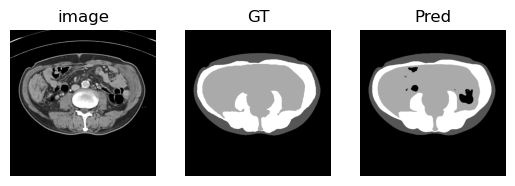

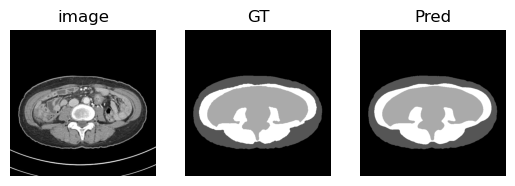

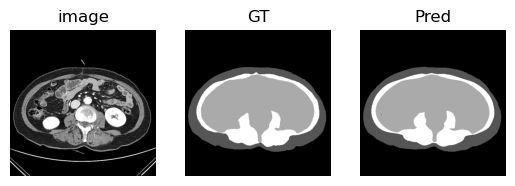

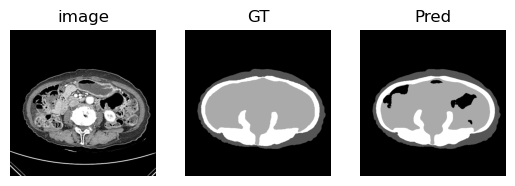

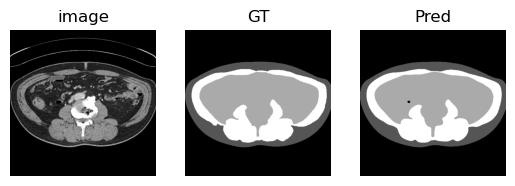

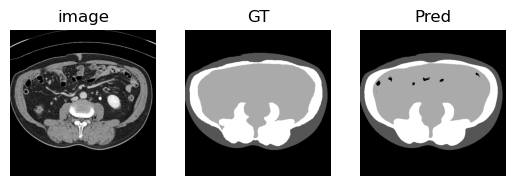

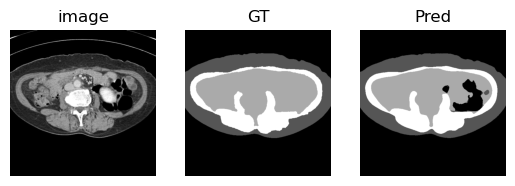

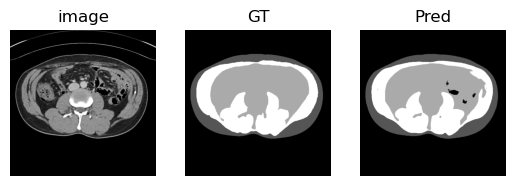

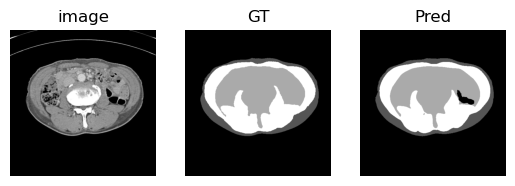

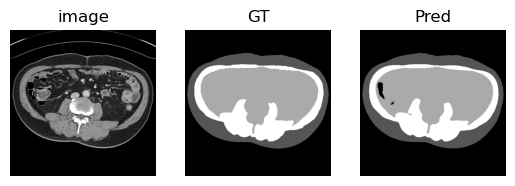

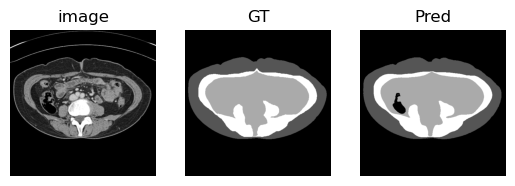

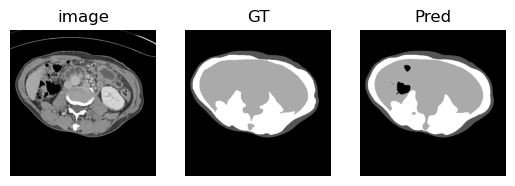

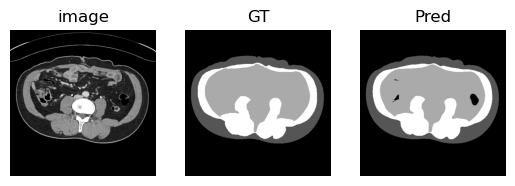

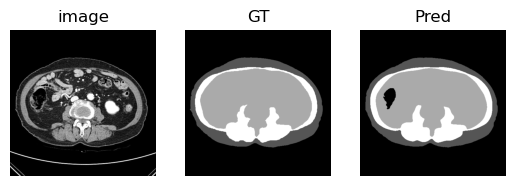

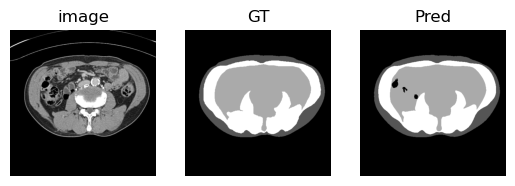

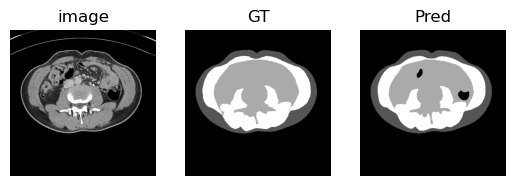

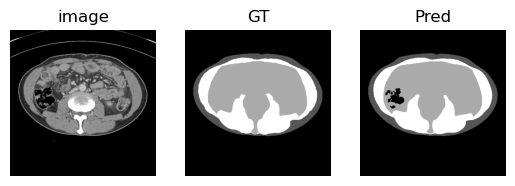

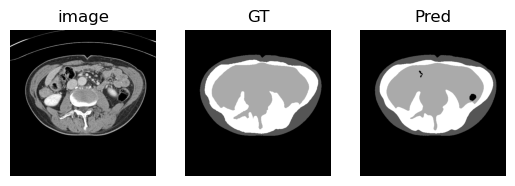

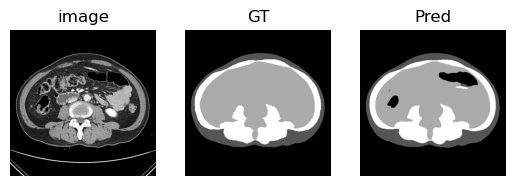

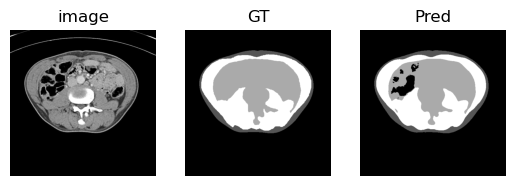

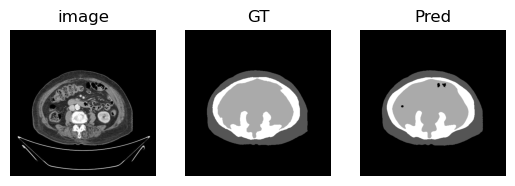

In [4]:
pred_mask_home=r'C:\Users\qwe14\0.code\nnUNet\nnUNet_results\Dataset121_MR\nnUNetTrainer__nnUNetPlans__2d\fold_5\test_set'
gt_mask_home=r"C:\Users\qwe14\0.code\nnUNet\nnUNet_raw\Dataset121_MR\labelsTs"
gt_img_home=r"C:\Users\qwe14\0.code\nnUNet\nnUNet_raw\Dataset121_MR\imagesTs"

pred_mask_paths = glob(f"{pred_mask_home}\*.png")
gt_mask_paths = glob(f"{gt_mask_home}\*.png")
gt_img_paths = glob(f"{gt_img_home}\*.png")

idx = 0
for pmp, gmp, gip in zip(pred_mask_paths, gt_mask_paths, gt_img_paths):
    idx+=1
    pm_mask = cv2.imread(pmp, cv2.IMREAD_GRAYSCALE)
    gm_mask = cv2.imread(gmp, cv2.IMREAD_GRAYSCALE)
    gt_image = cv2.imread(gip, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,1)
    plt.gca().set_title("image")
    plt.gca().axis("off")
    plt.imshow(gt_image.astype(np.float32), cmap = cm.gray)
    
    plt.subplot(1,3,2)
    plt.gca().set_title("GT")
    plt.gca().axis("off")
    plt.imshow(gm_mask.astype(np.float32), cmap = cm.gray) 

    plt.subplot(1,3,3)
    plt.gca().set_title("Pred")
    plt.gca().axis("off")
    plt.imshow(pm_mask.astype(np.float32), cmap = cm.gray)
    plt.show()
    if idx > 20:
        break

In [5]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

In [7]:
from sklearn.metrics import f1_score, accuracy_score
# 모두 sfat, muscle, vfat 순
def calculate_binary_metrics(pm_mask, gm_mask):
    pm_bin_mask_list = [np.zeros_like(pm_mask) for i in range(3)]
    gm_bin_mask_list = [np.zeros_like(gm_mask) for i in range(3)]
    for i in range(3):
        pm_bin_mask_list[i][pm_mask==i+1] = 1
        gm_bin_mask_list[i][gm_mask==i+1] = 1
    f1_list = [f1_score(pm_bin_mask_list[i].flatten(), gm_bin_mask_list[i].flatten(), average='macro') for i in range(3)]
    acc_list = [accuracy_score(pm_bin_mask_list[i].flatten(), gm_bin_mask_list[i].flatten()) for i in range(3)]

    return f1_list, acc_list
    
def calculate_iou(pm_mask, gm_mask):
    pm_bin_mask_list = [np.zeros_like(pm_mask) for i in range(3)]
    gm_bin_mask_list = [np.zeros_like(gm_mask) for i in range(3)]
    for i in range(3):
        pm_bin_mask_list[i][pm_mask==i+1] = 1
        gm_bin_mask_list[i][gm_mask==i+1] = 1
    
    intersection_list = [np.logical_and(pm_bin_mask_list[i], gm_bin_mask_list[i]) for i in range(3)]
    union_list_list = [np.logical_or(pm_bin_mask_list[i], gm_bin_mask_list[i]) for i in range(3)]
    
    iou_list = [np.sum(intersection_list[i]) / np.sum(union_list_list[i]) for i in range(3)]
    return iou_list

def calculate_dice_score(pm_mask, gm_mask):
    pm_bin_mask_list = [np.zeros_like(pm_mask) for i in range(3)]
    gm_bin_mask_list = [np.zeros_like(gm_mask) for i in range(3)]
    for i in range(3):
        pm_bin_mask_list[i][pm_mask==i+1] = 1
        gm_bin_mask_list[i][gm_mask==i+1] = 1
    
    intersection_list = [np.logical_and(pm_bin_mask_list[i], gm_bin_mask_list[i]) for i in range(3)]
    smooth = 0.000001
    dice_list = [(2 * np.sum(intersection_list[i]) + smooth)/(np.sum(pm_bin_mask_list[i]) + np.sum(gm_bin_mask_list[i]) + smooth) for i in range(3)]
    return dice_list

idx = 0
iou_list = []
acc_list = []
f1_macro_list = []
dice_score_list = []
for pmp, gmp in zip(pred_mask_paths, gt_mask_paths):
    idx+=1
    pm_mask = cv2.imread(pmp, cv2.IMREAD_GRAYSCALE)
    gm_mask = cv2.imread(gmp, cv2.IMREAD_GRAYSCALE)
    iou_list.append(calculate_iou(pm_mask, gm_mask))
    f1_macro, acc = calculate_binary_metrics(pm_mask, gm_mask)
    acc_list.append(acc)
    f1_macro_list.append(f1_macro)
    dice_score_list.append(calculate_dice_score(pm_mask, gm_mask))

In [9]:
print(f"IoU: {np.mean(iou_list, axis = 0)}")
print(f"f1_macro score: {np.mean(f1_macro_list, axis = 0)}")
print(f"accuacy: {np.mean(acc_list, axis = 0)}")
print(f"dice_score: {np.mean(dice_score_list, axis = 0)}")

IoU: [0.95033022 0.89425196 0.91567544]
f1_macro score: [0.98567289 0.96375608 0.97519908]
accuacy: [0.99475716 0.97857931 0.99035207]
dice_score: [0.97432034 0.94070718 0.95585051]
